In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from mlxtend.frequent_patterns import apriori, association_rules
sns.set_theme(style="whitegrid")

In [2]:
df = pd.read_csv(r"mock_fashion_data_uk_us.csv")

In [3]:
df.head(5)

,Product Name,Price,Brand,Category,Description,Rating,Review Count,Style Attributes,Total Sizes,Available Sizes,Color,Purchase History,Age,Fashion Magazines,Fashion Influencers,Season,Time Period Highest Purchase,Customer Reviews,Social Media Comments,feedback
0,T5D3,97.509966,Ralph Lauren,Footwear,Bad,1.421706,492,Streetwear,"M, L, XL",XL,Green,Medium,24,Vogue,Chiara Ferragni,Fall/Winter,Daytime,Mixed,Mixed,Other
1,Y0V7,52.341277,Ted Baker,Tops,Not Good,1.037677,57,Vintage,"M, L, XL",XL,Black,Above Average,61,Glamour,Leandra Medine,Winter,Weekend,Negative,Neutral,Other
2,N9Q4,15.430975,Jigsaw,Footwear,Very Bad,3.967106,197,Streetwear,"S, M, L",M,Blue,Average,27,Marie Claire,Gigi Hadid,Summer,Nighttime,Unknown,Negative,Neutral
3,V2T6,81.116542,Alexander McQueen,Outerwear,Not Good,2.844659,473,Formal,"S, M, L",L,Red,Very High,50,Marie Claire,Chiara Ferragni,Fall/Winter,Weekend,Neutral,Other,Other
4,S7Y1,31.633686,Tommy Hilfiger,Bottoms,Very Good,1.183242,55,Sporty,"M, L, XL",S,Green,Above Average,23,Glamour,Song of Style,Spring,Daytime,Positive,Mixed,Positive


Correlation between social media comments and customer reviews


In [4]:
import scipy.stats as stats
# Create a contingency table
contingency_table = pd.crosstab(df[df['Social Media Comments'] !="Other"]["Social Media Comments"], df[df['Social Media Comments'] !="Other"]['Customer Reviews'])

# Calculate the Chi-Square statistic and p-value
chi2, p, _, _ = stats.chi2_contingency(contingency_table)

# Calculate Cramér's V
n = contingency_table.sum().sum()  # Total number of observations
phi_c = np.sqrt(chi2 / (n * min(contingency_table.shape) - 1))
cramer_v = phi_c / np.sqrt(min(contingency_table.shape) - 1)

print("Contingency Table:")
print(contingency_table)

print("\nChi-Square Statistic:", chi2)
print("P-value:", p)
print("Cramer's V:", cramer_v)

Contingency Table:
Customer Reviews       Mixed  Negative  Neutral  Positive  Unknown
Social Media Comments                                             
Mixed                  33259     33411    33412     33442    33207
Negative               33210     33416    33704     33377    33071
Neutral                33552     33278    33176     33291    33361
Positive               33396     33321    33314     33594    33190
Unknown                33356     33301    33169     33079    33327

Chi-Square Statistic: 13.04541560701747
P-value: 0.6694342689993213
Cramer's V: 0.0008847808918556224


In [5]:
# Summary statistics for categorical columns
print("\nBrand Counts:")
print(df['Brand'].value_counts())


Brand Counts:
Brand
Ralph Lauren         125575
Jigsaw               125307
Tommy Hilfiger       125275
Alexander McQueen    125127
Burberry             124813
Calvin Klein         124710
Mulberry             124662
Ted Baker            124531
Name: count, dtype: int64


In [8]:


# Filter rows where Fashion Influencers column is not empty
influencer_data = df[df['Fashion Influencers'].notnull()]

# Calculate statistics
total_influencers = influencer_data.shape[0]
average_price = influencer_data['Price'].mean()
max_reviews = influencer_data['Review Count'].max()
most_common_brand = influencer_data['Brand'].mode()[0]

# Print the statistics
print("Total Fashion Influencers: ", total_influencers)
print("Average Price of Products Chosen: ", average_price)
print("Maximum Review Count: ", max_reviews)
print("Most Common Brand: ", most_common_brand)



Total Fashion Influencers:  1000000
Average Price of Products Chosen:  55.00142783397516
Maximum Review Count:  499
Most Common Brand:  Ralph Lauren


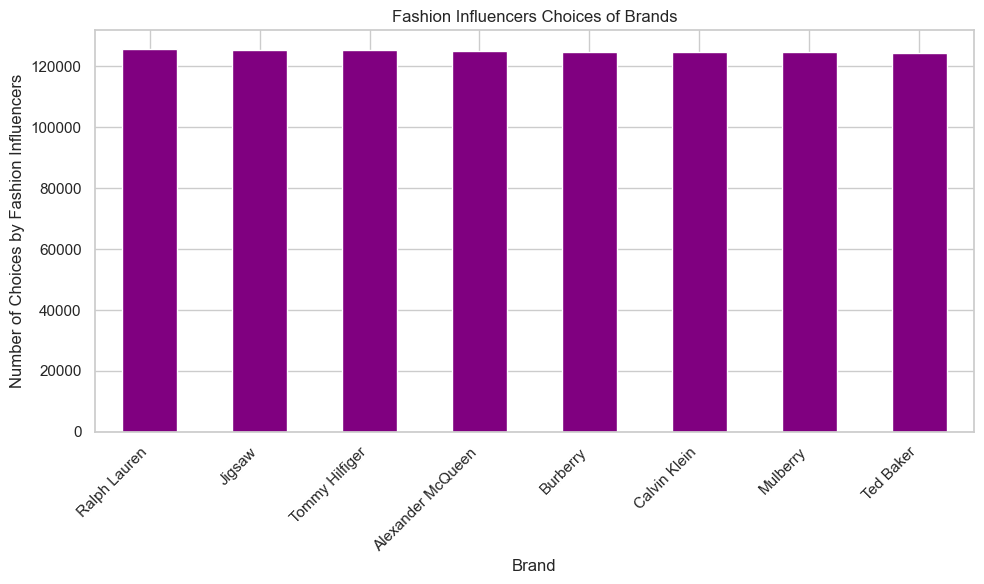

In [9]:

# Filter rows where Fashion Influencers column is not empty
influencer_data = df[df['Fashion Influencers'].notnull()]

# Count the occurrences of each brand chosen by fashion influencers
brand_counts = influencer_data['Brand'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
brand_counts.plot(kind='bar', color='purple')
plt.xlabel('Brand')
plt.ylabel('Number of Choices by Fashion Influencers')
plt.title('Fashion Influencers Choices of Brands')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [10]:

# Filter rows where Fashion Influencers column is not empty
influencer_data = df[df['Fashion Influencers'].notnull()]

# Group the data by Brand and count the number of unique Fashion Influencers per brand
influencer_counts_per_brand = influencer_data.groupby('Brand')['Fashion Influencers'].nunique()

# Display the total number of Fashion Influencers per brand
print(influencer_counts_per_brand)


Brand
Alexander McQueen    10
Burberry             10
Calvin Klein         10
Jigsaw               10
Mulberry             10
Ralph Lauren         10
Ted Baker            10
Tommy Hilfiger       10
Name: Fashion Influencers, dtype: int64


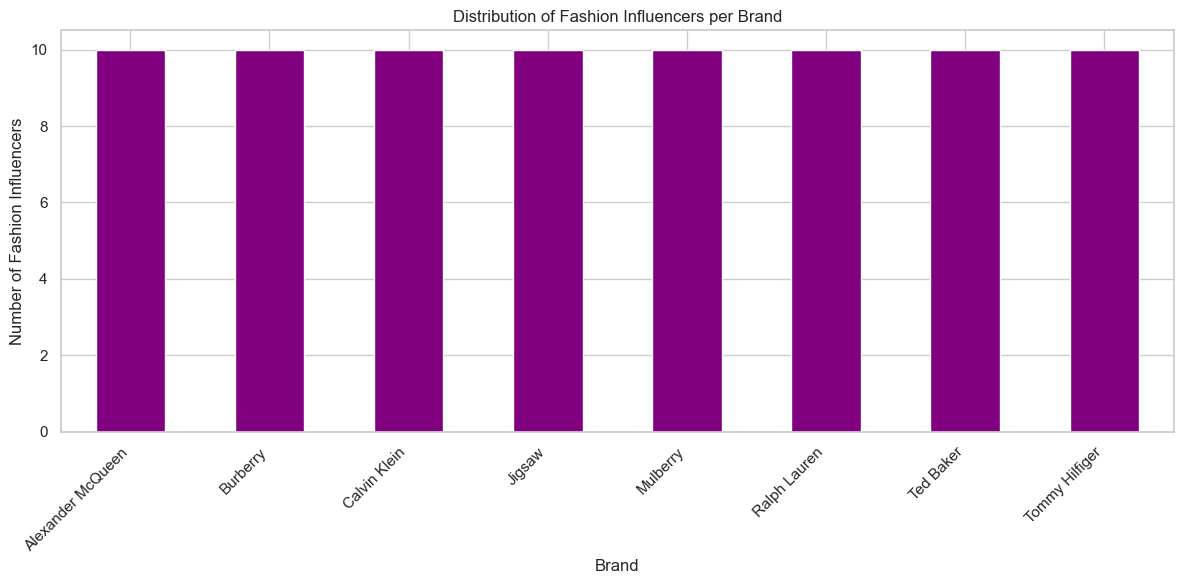

In [11]:

# Filter rows where Fashion Influencers column is not empty
influencer_data = df[df['Fashion Influencers'].notnull()]

# Group the data by Brand and count the number of unique Fashion Influencers per brand
influencer_counts_per_brand = influencer_data.groupby('Brand')['Fashion Influencers'].nunique()

# Create a bar plot to visualize the distribution
plt.figure(figsize=(12, 6))
influencer_counts_per_brand.sort_values(ascending=False).plot(kind='bar', color='purple')
plt.xlabel('Brand')
plt.ylabel('Number of Fashion Influencers')
plt.title('Distribution of Fashion Influencers per Brand')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


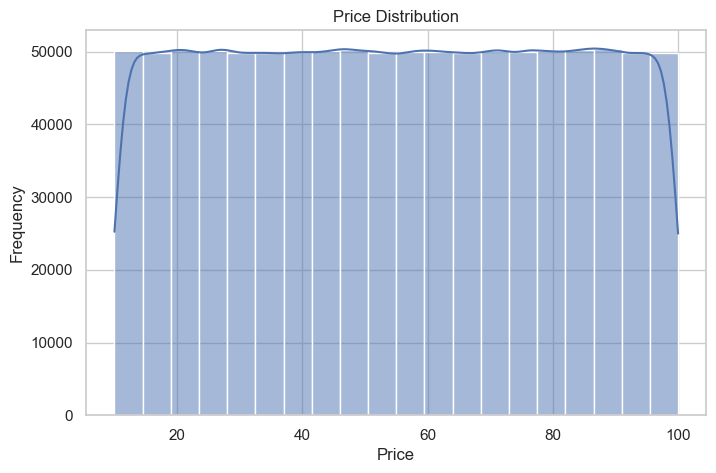

In [53]:
# Visualize price distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Price'], bins=20, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

c:\Users\USER\Documents\yolo_nas_deepsort\Django_VideoStream-master\video\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 800x500 with 0 Axes>

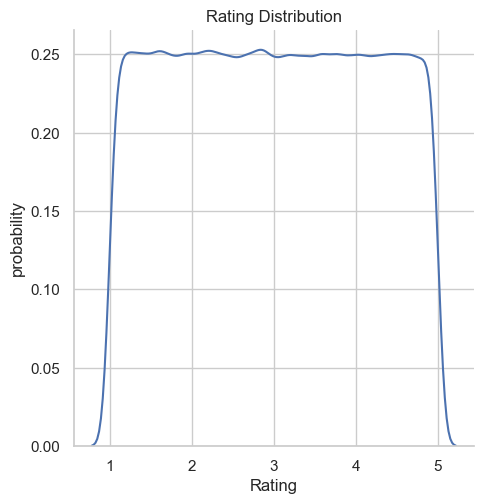

In [54]:
# Visualize rating distribution
plt.figure(figsize=(8, 5))
sns.displot(df['Rating'], kind="kde")
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('probability')
plt.show()

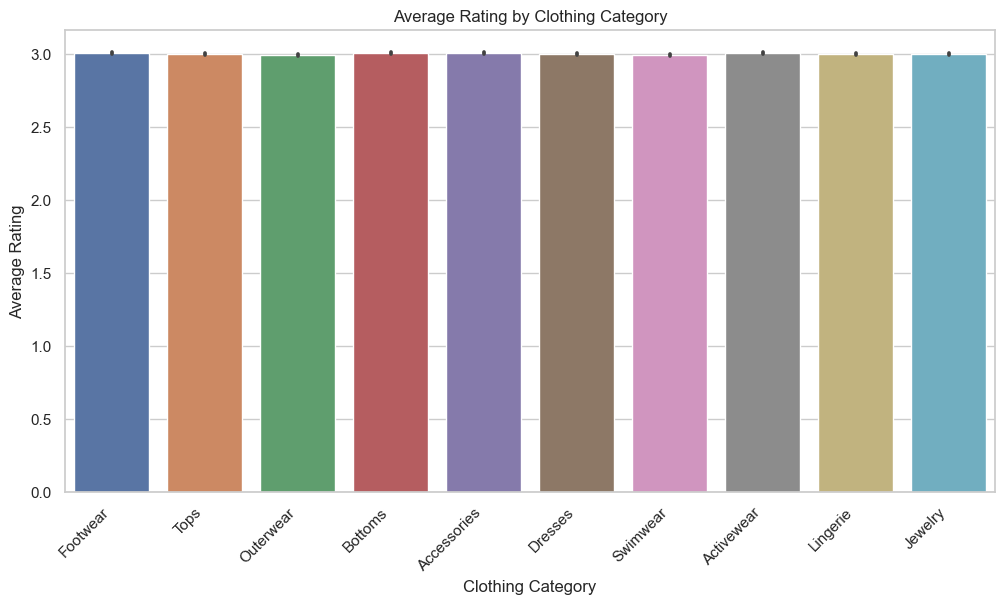

In [55]:
# Visualize average ratings for different clothing categories
plt.figure(figsize=(12, 6))
sns.barplot(x='Category', y='Rating', data=df)
plt.title('Average Rating by Clothing Category')
plt.xlabel('Clothing Category')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.show()

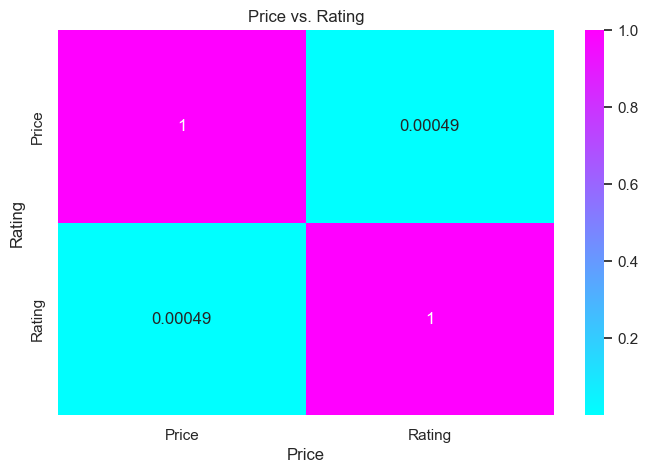

In [56]:
# Correlation between price and rating
plt.figure(figsize=(8, 5))
sns.heatmap(df[['Price','Rating']].corr(), annot=True,cmap=plt.cm.cool) 
plt.title('Price vs. Rating')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.show()

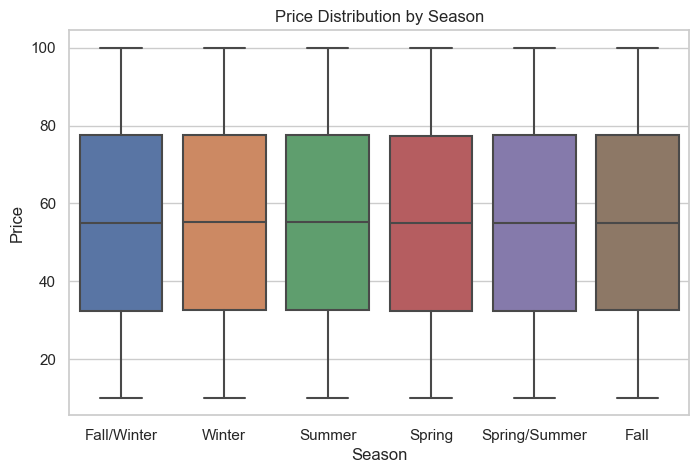

In [57]:
# Seasonal Trends (Box Plot)
plt.figure(figsize=(8, 5))
sns.boxplot(x='Season', y='Price', data=df)
plt.title('Price Distribution by Season')
plt.xlabel('Season')
plt.ylabel('Price')
plt.show()


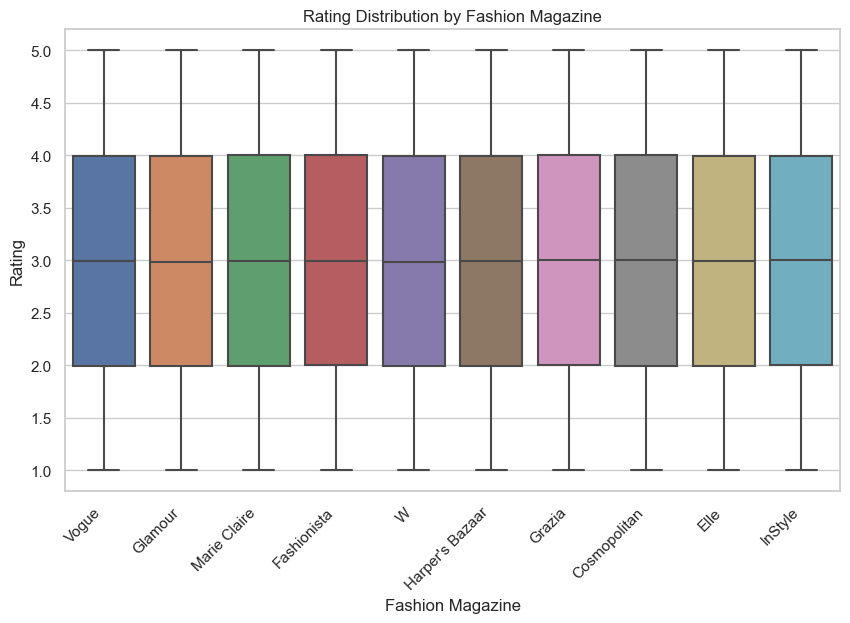

In [58]:
# Rating Distribution by Fashion Magazine (Box Plot)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Fashion Magazines', y='Rating', data=df)
plt.title('Rating Distribution by Fashion Magazine')
plt.xlabel('Fashion Magazine')
plt.ylabel('Rating')
plt.xticks(rotation=45, ha='right')
plt.show()

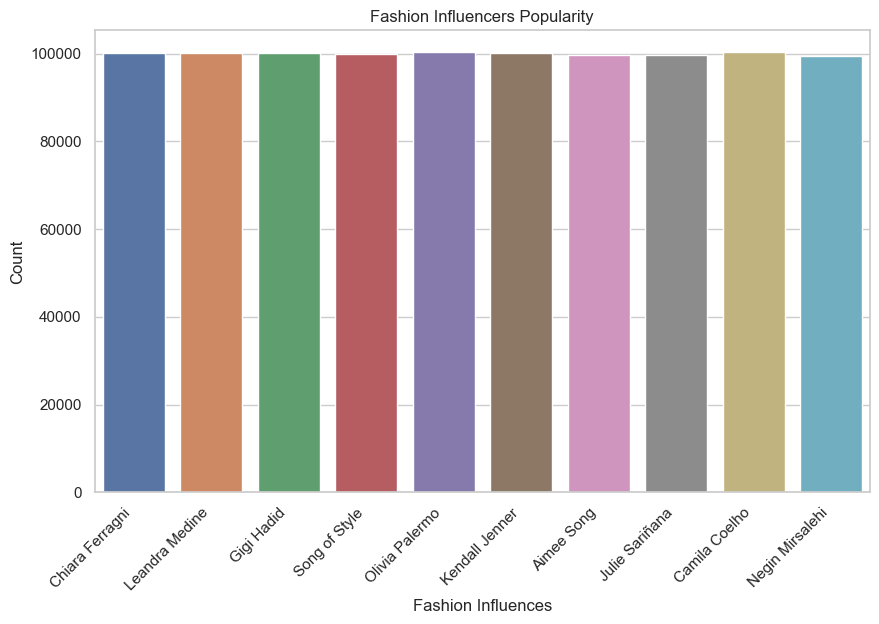

In [59]:
# Fashion Influences Analysis (Bar Plot)
plt.figure(figsize=(10, 6))
sns.countplot(x = df['Fashion Influencers'])
plt.title('Fashion Influencers Popularity')
plt.xlabel('Fashion Influences')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

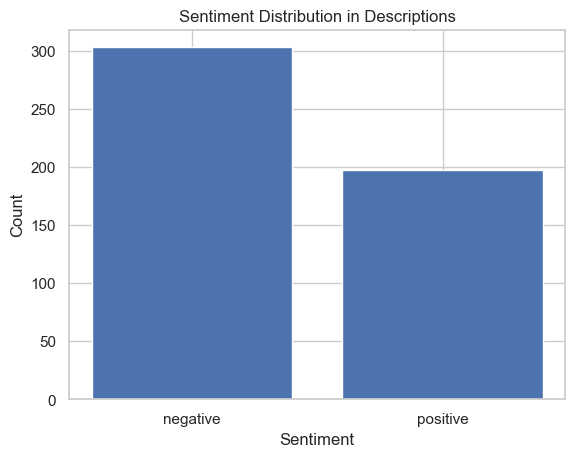

In [60]:
import pandas as pd
from textblob import TextBlob


# Step 3: Sentiment Analysis on Description
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment_score = blob.sentiment.polarity 
    if sentiment_score > 0:
        return 'positive'
    elif sentiment_score < 0:
        return 'negative'
    else:
        return 'neutral'

df['Sentiment'] = df['Description'][:500].apply(get_sentiment)

# Step 4: Data Exploration and Visualization of Sentiments
sentiment_counts = df['Sentiment'].value_counts()
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution in Descriptions')
plt.show()

In [61]:

# Step 6: Clustering and Categorization
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

attributes = ['Price', 'Rating']
X_attributes = df[attributes]

scaler = StandardScaler()
X_attributes_scaled = scaler.fit_transform(X_attributes)

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_attributes_scaled)

# Association Rule Mining
basket_sets = df[['Product Name', 'Purchase History']]
basket_sets = basket_sets.drop_duplicates().groupby('Product Name')['Purchase History'].apply(list)
basket_sets = basket_sets.apply(lambda x: ','.join(map(str, x)))

basket_encoded = basket_sets.str.get_dummies(',')
frequent_itemsets = apriori(basket_encoded, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.5)

# View the rules
print(rules)

c:\Users\USER\Documents\yolo_nas_deepsort\Django_VideoStream-master\video\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\USER\Documents\yolo_nas_deepsort\Django_VideoStream-master\video\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []


In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score, confusion_matrix
features = ['Brand', 'Category', 'Color', 'Rating', 'Fashion Magazines', 'Fashion Influencers', 'Season']
target = 'Price'
X = df[features]
y = df[target]
X_encoded = pd.get_dummies(X)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
# Build and train the Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train[:10000], y_train[:10000])

# Make predictions on the test set
y_pred = rf_model.predict(X_test[:100])
# Evaluate the model's performance
mse = np.sqrt(mean_squared_error(y_test[:100], y_pred))
r_squared = r2_score(y_test[:100], y_pred)
mae = mean_absolute_error(y_test[:100], y_pred)
evs = explained_variance_score(y_test[:100], y_pred)
print("Root Mean Squared Error:", mse)
print("R-squared:", r_squared)
print("Mean Absolute Error:", mae)
print("Explained Variance Score:", evs )

 

Root Mean Squared Error: 26.53468628143146
R-squared: -0.06131536771235391
Mean Absolute Error: 22.223300045937567
Explained Variance Score: -0.06083939334441357


In [63]:
selected_features = ['Brand', 'Category', 'Color', 'Rating', 'Fashion Magazines', 'Fashion Influencers', 'Season']


new_data = df[selected_features].copy()
new_data['PredictedTrend'] = None
new_data
y_pred


array([56.29699702, 60.9585672 , 52.72056524, 38.45540692, 49.93033119,
       50.78506462, 53.79804373, 58.84555372, 61.42367443, 54.78770472,
       58.70526046, 68.68611858, 67.62438863, 53.64252765, 48.94213889,
       60.45430202, 61.91359894, 47.07135804, 51.87750795, 54.4653909 ,
       62.55105546, 50.25755287, 57.58730219, 52.5053063 , 57.91738347,
       55.12195483, 53.06051031, 53.37350702, 54.78696691, 43.48633188,
       66.24337967, 50.05096602, 56.55201428, 47.29548757, 44.81438533,
       68.93370011, 46.59936266, 53.51211283, 62.06293021, 56.81450407,
       60.95810303, 67.62929421, 63.41778915, 45.3324863 , 50.28038219,
       53.28950739, 55.33308076, 52.8295376 , 50.53162037, 50.99946891,
       52.65104988, 58.18080064, 60.86823856, 48.89183365, 66.30713969,
       49.63208117, 53.24319683, 56.62110255, 60.50734769, 54.6860918 ,
       56.72844282, 62.32951778, 44.02375013, 56.06548365, 45.73470041,
       60.18435959, 54.51558676, 47.41307576, 52.75567181, 51.54

In [64]:
new_data.loc[X_test[:100].index, 'PredictedBrand'] = y_pred
new_data.head(100)

,Brand,Category,Color,Rating,Fashion Magazines,Fashion Influencers,Season,PredictedTrend,PredictedBrand
0,Ralph Lauren,Footwear,Green,1.421706,Vogue,Chiara Ferragni,Fall/Winter,None,NaN
1,Ted Baker,Tops,Black,1.037677,Glamour,Leandra Medine,Winter,None,NaN
2,Jigsaw,Footwear,Blue,3.967106,Marie Claire,Gigi Hadid,Summer,None,NaN
3,Alexander McQueen,Outerwear,Red,2.844659,Marie Claire,Chiara Ferragni,Fall/Winter,None,NaN
4,Tommy Hilfiger,Bottoms,Green,1.183242,Glamour,Song of Style,Spring,None,NaN
...,...,...,...,...,...,...,...,...,...
95,Mulberry,Bottoms,Green,4.116289,Elle,Leandra Medine,Summer,None,NaN
96,Ralph Lauren,Bottoms,Green,2.479762,Elle,Julie Sariñana,Winter,None,NaN
97,Alexander McQueen,Outerwear,Blue,3.255571,Grazia,Chiara Ferragni,Fall/Winter,None,NaN
98,Jigsaw,Activewear,Black,3.490283,InStyle,Chiara Ferragni,Fall/Winter,None,NaN


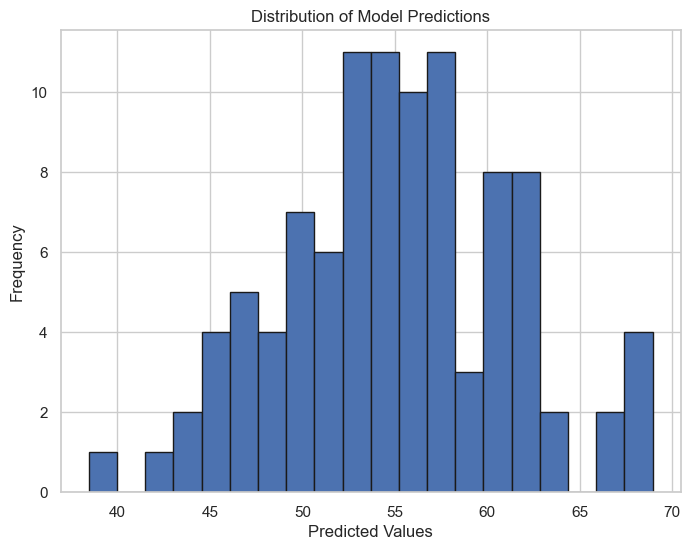

In [66]:
plt.figure(figsize=(8, 6))
plt.hist(y_pred, bins=20, edgecolor='k')
plt.title('Distribution of Model Predictions')
plt.xlabel('Predicted Values')
plt.ylabel('Frequency')
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_16996\66336831.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_pred, shade=True)


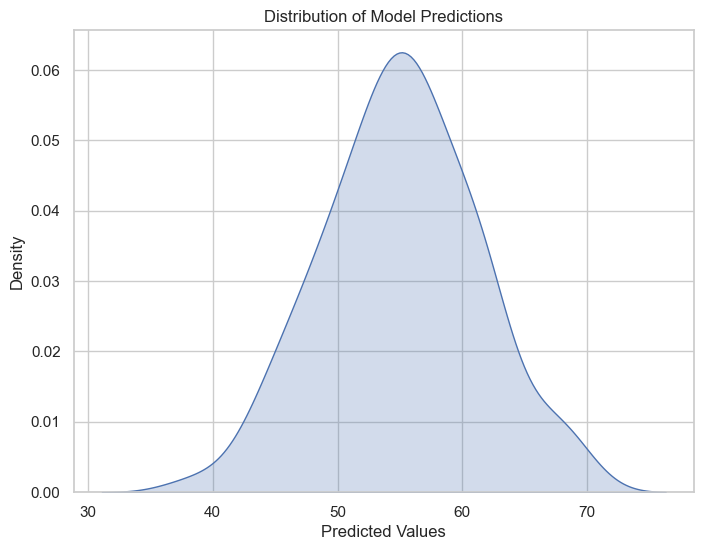

In [67]:
plt.figure(figsize=(8, 6))
sns.kdeplot(y_pred, shade=True)
plt.title('Distribution of Model Predictions')
plt.xlabel('Predicted Values')
plt.ylabel('Density')
plt.show()

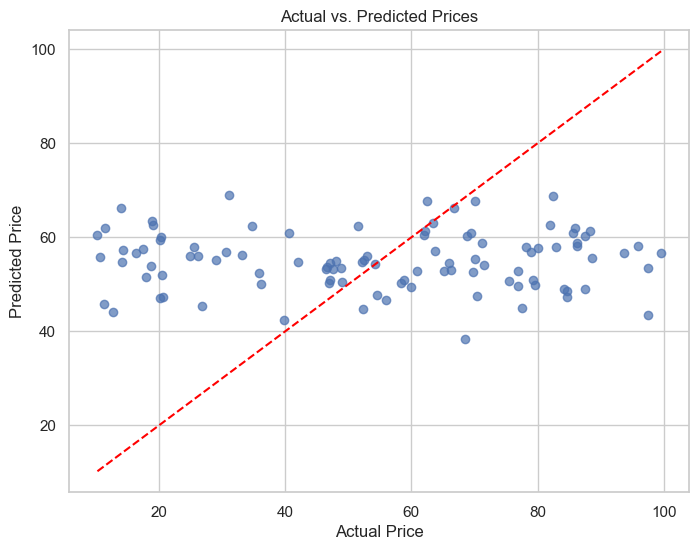

In [71]:
import matplotlib.pyplot as plt

# Plot the prediction graph
plt.figure(figsize=(8, 6))
plt.scatter(y_test[:100], y_pred, alpha=0.7)
plt.plot([min(y_test[:100]), max(y_test[:100])], [min(y_test[:100]), max(y_test[:100])], color='red', linestyle='--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Prices')
plt.grid(True)
plt.show()


Support vector Regressor

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score
features = ['Brand', 'Category', 'Color', 'Rating', 'Fashion Magazines', 'Fashion Influencers', 'Season']
target = 'Price'
X = df[features]
y = df[target]
X_encoded = pd.get_dummies(X)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
# Build and train the Random Forest Regression model
svr_model = SVR(kernel='linear', C=1.0)
svr_model.fit(X_train[:10000], y_train[:10000])
# Make predictions on the test set
y_pred_svr = svr_model.predict(X_test[:100])
# Evaluate the model's performance
mse_svr = np.sqrt(mean_squared_error(y_test[:100], y_pred_svr))
r_squared_svr = r2_score(y_test[:100], y_pred_svr)
mae_svr = mean_absolute_error(y_test[:100], y_pred_svr)
evs_svr = explained_variance_score(y_test[:100], y_pred_svr)
print("Root Mean Squared Error:", mse_svr)
print("R-squared:", r_squared_svr)
print("Mean Absolute Error:", mae_svr)
print("Explained Variance Score:", evs_svr )

Root Mean Squared Error: 25.77078756334266
R-squared: -0.0010872264789458796
Mean Absolute Error: 21.99823716021313
Explained Variance Score: -0.001069605717376021


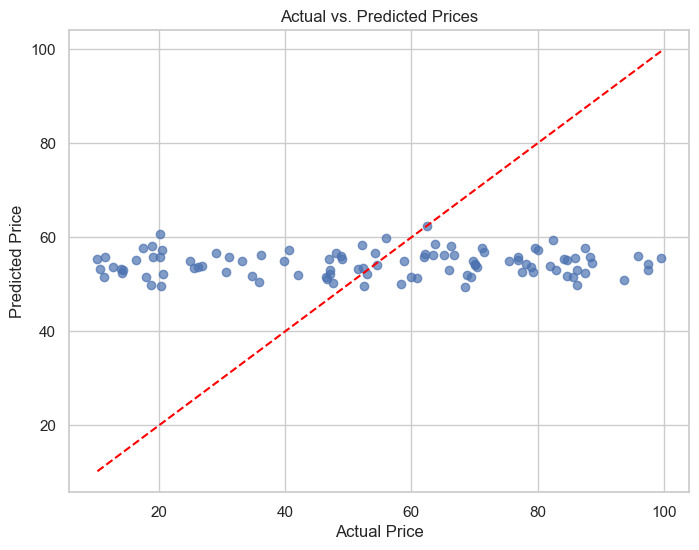

In [70]:
import matplotlib.pyplot as plt

# Plot the prediction graph
plt.figure(figsize=(8, 6))
plt.scatter(y_test[:100], y_pred_svr, alpha=0.7)
plt.plot([min(y_test[:100]), max(y_test[:100])], [min(y_test[:100]), max(y_test[:100])], color='red', linestyle='--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Prices')
plt.grid(True)
plt.show()


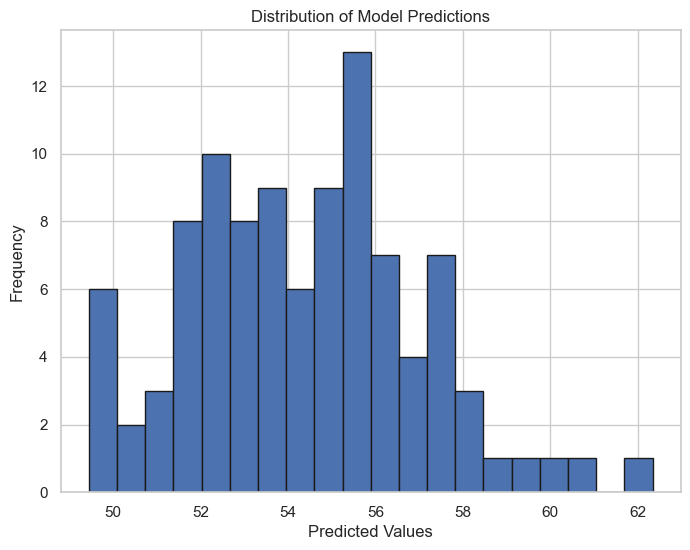

In [72]:
import matplotlib.pyplot as plt

# Assuming 'predictions' contains the predicted values from your model

# Create a histogram of the predictions
plt.figure(figsize=(8, 6))
plt.hist(y_pred_svr, bins=20, edgecolor='k')
plt.title('Distribution of Model Predictions')
plt.xlabel('Predicted Values')
plt.ylabel('Frequency')
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_16996\1129957283.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_pred_svr, shade=True)


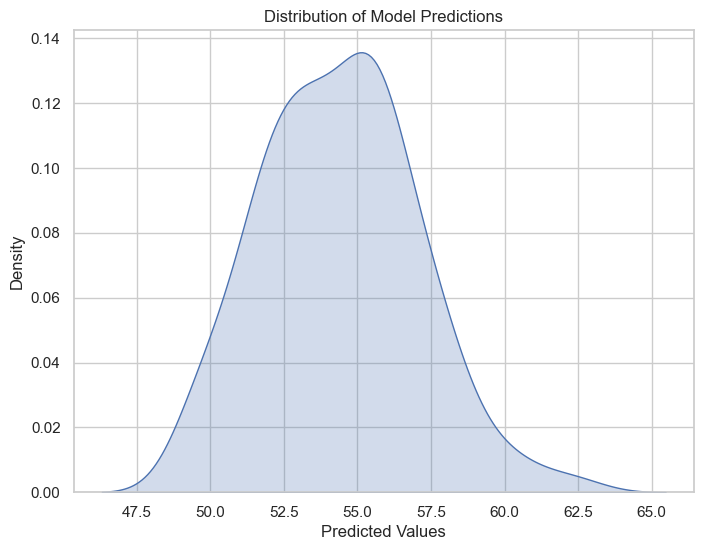

In [73]:
plt.figure(figsize=(8, 6))
sns.kdeplot(y_pred_svr, shade=True)
plt.title('Distribution of Model Predictions')
plt.xlabel('Predicted Values')
plt.ylabel('Density')
plt.show()

K Neighbors Regressor

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score, accuracy_score
features = ['Brand', 'Category', 'Color', 'Rating', 'Fashion Magazines', 'Fashion Influencers', 'Season']
target = 'Price'
X = df[features]
y = df[target]
X_encoded = pd.get_dummies(X)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
# Build and train the Random Forest Regression model
knn_model = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors (k) as needed.
knn_model.fit(X_train[:10000], y_train[:10000])
# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test[:100])
# Evaluate the model's performance
mse_knn = np.sqrt(mean_squared_error(y_test[:100], y_pred_knn))
r_squared_knn = r2_score(y_test[:100], y_pred_knn)
mae_knn = mean_absolute_error(y_test[:100], y_pred_knn)
evs_knn = explained_variance_score(y_test[:100], y_pred_knn)

print("Root Mean Squared Error:", mse_knn)
print("R-squared:", r_squared_knn)
print("Mean Absolute Error:", mae_knn)
print("Explained Variance Score:", evs_knn )

Root Mean Squared Error: 28.74805797145778
R-squared: -0.2457576477994463
Mean Absolute Error: 23.878936941523207
Explained Variance Score: -0.24474581660264438


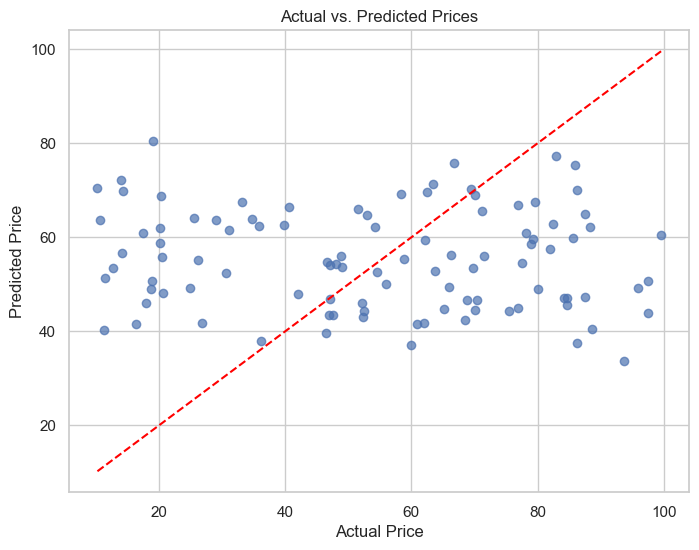

In [76]:
import matplotlib.pyplot as plt

# Plot the prediction graph
plt.figure(figsize=(8, 6))
plt.scatter(y_test[:100], y_pred_knn, alpha=0.7)
plt.plot([min(y_test[:100]), max(y_test[:100])], [min(y_test[:100]), max(y_test[:100])], color='red', linestyle='--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Prices')
plt.grid(True)
plt.show()


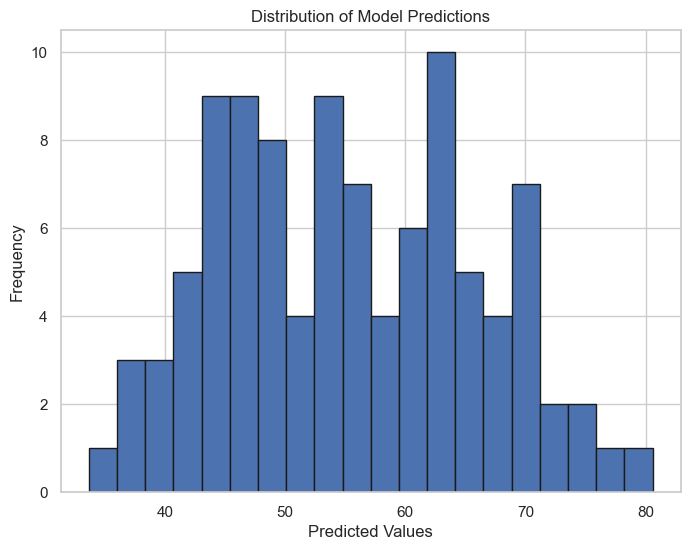

In [77]:
import matplotlib.pyplot as plt

# Assuming 'predictions' contains the predicted values from your model

# Create a histogram of the predictions
plt.figure(figsize=(8, 6))
plt.hist(y_pred_knn, bins=20, edgecolor='k')
plt.title('Distribution of Model Predictions')
plt.xlabel('Predicted Values')
plt.ylabel('Frequency')
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_16996\2781282497.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_pred_knn, shade=True)


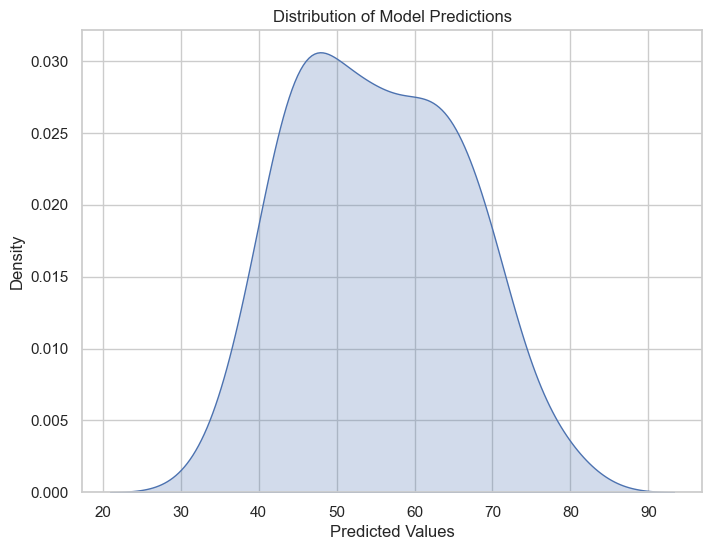

In [78]:
plt.figure(figsize=(8, 6))
sns.kdeplot(y_pred_knn, shade=True)
plt.title('Distribution of Model Predictions')
plt.xlabel('Predicted Values')
plt.ylabel('Density')
plt.show()